## Supuestos estructurales del Modelo Clásico de Regresión Lineal (MCRL)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns # Visualización de datos
import statsmodels.stats.api as sms

In [2]:
data=pd.read_csv("C:/Users/57317/Desktop/Universidad Nacional/Programación/Python/Curso Econometría básica con Python/Bases de datos/GujaratiPorter71.txt", delimiter="\t")

In [3]:
data.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


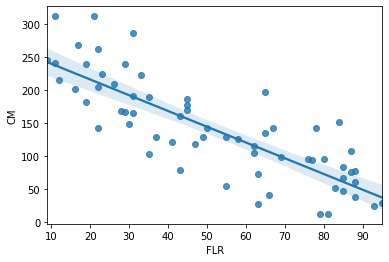

In [4]:
sns.regplot(x=data["FLR"], y=data["CM"]);

**Supuesto #6:**

In [6]:
#Observaciones mayores a parametros
data.shape

(64, 4)

In [11]:
Modelo_de_Prueba=sm.OLS(data["CM"][0:3],sm.add_constant(data[["PGNP","FLR","TFR"]][0:3]))
Resultados = Modelo_de_Prueba.fit()
print(Resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 12 Apr 2021   Prob (F-statistic):                nan
Time:                        17:13:49   Log-Likelihood:                 66.190
No. Observations:                   3   AIC:                            -126.4
Df Residuals:                       0   BIC:                            -129.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2453        inf          0        n

C:\Users\57317\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\57317\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\57317\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\57317\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


**Supuesto #7:**

In [4]:
#Variabilidad en las variables

In [12]:
sm.add_constant(data).apply(np.std)

const       0.000000
CM         75.382151
FLR        25.803873
PGNP     2704.317439
TFR         1.497158
dtype: float64

In [13]:
pd.DataFrame(data.apply(np.std),columns=["Desviación estándar"])

,Desviación estándar
CM,75.382151
FLR,25.803873
PGNP,2704.317439
TFR,1.497158


**Supuesto #8:**

In [15]:
#Multicolinealidad

In [14]:
data.corr()

,CM,FLR,PGNP,TFR
CM,1.000000,-0.818285,-0.407697,0.671135
FLR,-0.818285,1.000000,0.268530,-0.625954
PGNP,-0.407697,0.268530,1.000000,-0.185718
TFR,0.671135,-0.625954,-0.185718,1.000000


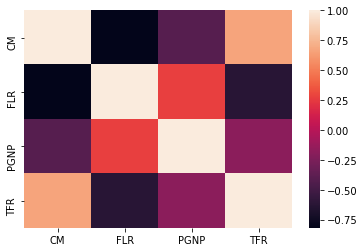

In [15]:
correlaciones=data.corr()
fig,ax=plt.subplots()
sns.heatmap(correlaciones)
plt.show()

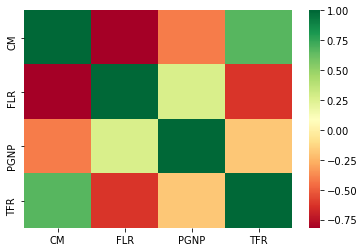

In [16]:
correlaciones=data.corr()
fig,ax=plt.subplots()
sns.heatmap(correlaciones,cmap="RdYlGn")
plt.show()

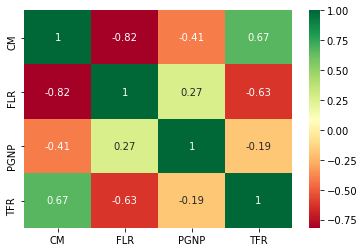

In [17]:
correlaciones=data.corr()
fig,ax=plt.subplots()
sns.heatmap(correlaciones,cmap="RdYlGn", annot = True)
plt.show()

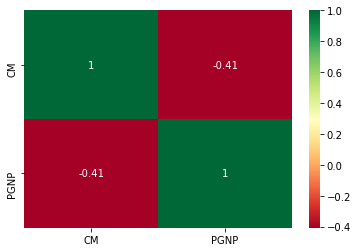

In [18]:
correlaciones=data[["CM","PGNP"]].corr()
fig,ax=plt.subplots()
sns.heatmap(correlaciones,cmap="RdYlGn", annot = True)
plt.show()

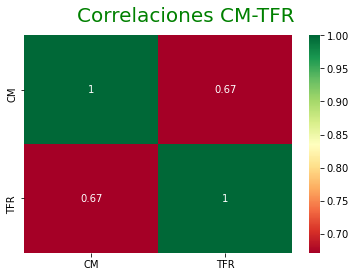

In [19]:
correlaciones2=data[["CM","TFR"]].corr()
fig,ax=plt.subplots()
fig.suptitle("Correlaciones CM-TFR",fontsize=20,color="green")
sns.heatmap(correlaciones2, cmap="RdYlGn", annot = True)
plt.show()

In [16]:
# Vif 

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Nombre"] = data.columns
  
# Calculo de VIF
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
                            
print(vif_data)

  Nombre        VIF
0     CM  12.465787
1    FLR   3.937469
2   PGNP   1.494594
3    TFR  20.210255


In [21]:
print(len(data.columns))

4


**Supuesto de no sesgo de especificación**

In [25]:
Modelo1=sm.OLS(data["CM"],sm.add_constant(data[["PGNP","FLR"]]))

In [27]:
Resultados1=Modelo1.fit()
print(Resultados1.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           5.12e-17
Time:                        17:52:20   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6416     11.593     22.741      0.0

In [28]:
Valores_estimados=Resultados.predict()

In [29]:
Residuos=Resultados1.resid

In [30]:
# Prueba CUSUM para medir cambio estructural

# H0 : No hay cambio estructural
# H1: Hay cambio estructural

ResultadosCUSUM = sms.breaks_cusumolsresid(Residuos)
print(ResultadosCUSUM)

# 0,51 > 0.05 Acepta la H0: No hay cambio estructural

(0.5191974341185545, 0.9503227705917878, [(1, 1.63), (5, 1.36), (10, 1.22)])


In [25]:
# Para evaluar si la forma funcional es la correcta se utiliza el test de RESET de Ramsey

ResultadosRESET = sms.___________(Resultados1)
Estadistico = _______________
p_valor = ________________

Nombres = ["Estadistico","p-valor"]
pd.DataFrame([___________,___________], index = Nombres, columns = ["Reset"])

# Como p-valor es mayor a 0.05 la regresión tiene una correcta forma funcional 

AttributeError: module 'statsmodels.stats.api' has no attribute '___________'

## Ejercicio

Realice un modelo de regresión lineal con la base de datos Ingreso_Ahorro disponible en la sesión 3 del moodle; adicionalmente, verifique el cumplimieneto de los supuesto vistos en clase.

Este archivo de datos contiene información sobre 26 automóviles, a saber, su marca, precio, millas por galón, calificación de reparación (en 1978), peso en libras, longitud en pulgadas y si el automóvil era extranjero o nacional. Aquí está el archivo de datos.

In [91]:
dataEjercicio=pd.read_csv("_____________________")

In [26]:
sns.catplot(______________)

NameError: name '______________' is not defined

In [27]:
sns.catplot(_____________, hue="foreign", kind="swarm", _________)

SyntaxError: positional argument follows keyword argument (<ipython-input-27-392ab2570258>, line 1)